# Aircraft Saftey Analysis


**Author:** Noah Meakins
***

# Overview

This in-depth analysis is intended to guide our company's foray into the commercial and private aviation sectors. By identifying historical safety risks and the most common causes of serious accidents, we aim to implement best practices and safety standards that surpass industry norms. This proactive approach to safety and risk analysis will be foundational in establishing our company as a responsible and trustworthy player in the aviation industry.

### Business Problem

My company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises but do not know anything about the potential risks of aircraft. I have been tasked with determining which aircraft are the lowest risk for the company to start this new business endeavor. With the data I will gather from the attached dataset, I will provide insights that will assist the head of the new aviation division, which can then use those insights to help decide which aircraft to purchase. Some specific data I will be analyzing at a deeper level are Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. Some questions I will be asking myself during this analysis are:

1. Out of the columns that might have missing data, what methods should I implement for columns that I will need in my analysis? 
2. What Charts will be beneficial in presenting a visual representation of my analysis? 
3. How will I determine the safest and most profitable aircraft to invest in? 

These questions are important from a business perspective because if the data in my analysis is skewed due to missing data or data that doesn’t pertain to this analysis, it can negatively influence business decisions.  
***

### Data Understanding

- The data for this project was sourced from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It's relevant to our analysis as we aim to understand various aircraft models and the levels of saftey associated with them. 

- The dataset consists of individual aircraft accidents, each record detailing the accident. It includes data from incidents in the United States and international waters. Key variables include Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. 

- For this analysis, in line with our company's focus on safety and risk assessment, the primary target variable is 'total fatal injuries'. Analyzing this variable will help us assess the severity of accidents and understand the safety challenges inherent in the aviation industry, especially pertinent to commercial and private flight operations.


In [60]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200) # I wanted to see all the columns in the dataset when printing the dataframe
pd.set_option('max_row', 200)
%matplotlib inline

In [61]:
df = pd.read_csv('/Users/unit66/Downloads/AviationData.csv', encoding='latin-1', low_memory=False)

In [62]:
df.shape

(88889, 31)

In [63]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [64]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [65]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Aviation Data 
The Aviation dataset consists of records from 1962 to 2023, and contains a large amount of information on Event Date, Location, Aircraft Damage, Injury Severity, and Total Fatal Injuries.

In [67]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation

In preparation for this analysis, I will simplify our tasks by normalizing the column names and dropping anything we wont need. This will make things a bit easier to analyze. 


In [68]:
# Subsetting the data to only include the columns I want to work with and making a copy of the dataframe
df = df[[#'Event.Id', 
       'Investigation.Type', 
       # 'Accident.Number', 
       'Event.Date',
       'Location', 'Country', 
       # 'Latitude', 'Longitude', 'Airport.Code',
       # 'Airport.Name', 
       'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 
       # 'Registration.Number', 
       'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
       # 'FAR.Description',
       # 'Schedule', 
       'Purpose.of.flight', 
       # 'Air.carrier', 
       'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 
       # 'Report.Status',
       #'Publication.Date'
       ]].copy()

In [69]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [70]:
df.dtypes

Investigation.Type                object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
dtype: object

['latitude', 'longitude', 'far_description', 'schedule', 'air_carrier', 'airport_code', 'airport_name', 'event_id', 'accident_number', 'registration_number', 'report_status', 'publication_date']

In [71]:
# Creating a function that take the column names and return a normalized version of it
def normalize_column_name(name):
    return name.strip().lower().replace(' ', '_').replace('.','_').replace('-','_')

In [72]:
# List comprehension to apply the function to all the column names
df.columns = [normalize_column_name(col) for col in df.columns]

In [73]:
# Verifying that the column names have been normalized
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [74]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

In [75]:
df.loc[df.duplicated()]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
1371,Accident,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,7.0,VMC,Cruise
3082,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise
4761,Accident,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Substantial,NaN,Schempp-hirth,STANDARD CIRRUS,No,NaN,Unknown,Unknown,1.0,0.0,0.0,1.0,VMC,Cruise
7941,Accident,1984-04-13,"DELAND, FL",United States,Non-Fatal,Substantial,NaN,Cessna,172P,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Taxi
8661,Accident,1984-06-18,"PORTLAND, AR",United States,Non-Fatal,Substantial,NaN,Snow,AT400,No,1.0,Turbo Prop,Aerial Application,0.0,0.0,0.0,2.0,VMC,Landing
13532,Accident,1985-11-30,"SAN PEDRO, CA",United States,Fatal(1),Destroyed,NaN,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,1.0,4.0,7.0,0.0,VMC,Approach
19820,Incident,1988-03-10,"GREENSBORO, NC",United States,Incident,NaN,NaN,Boeing,737,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,159.0,VMC,Maneuvering
21077,Incident,1988-08-05,"ATLANTA, GA",United States,Incident,Minor,NaN,Douglas,DC-9-51,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,199.0,UNK,Taxi
22453,Incident,1989-03-01,"HOUSTON, TX",United States,Incident,NaN,NaN,Mcdonnell Douglas,DC-9-82,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,185.0,IMC,Approach
24878,Accident,1990-02-09,"TETERBORO, NJ",United States,Non-Fatal,Substantial,NaN,Mitsubishi,MU-2B-35,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,Taxi


In [76]:
# Dropping duplicated rows from the dataframe
df = df.drop_duplicates()

# Resetting the index of the dataframe
df.reset_index(drop=True, inplace=True)

In [77]:
# Verifying that the duplicated rows have been dropped
df.loc[df.duplicated()]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight


In [78]:
# List of columns to check for missing data
columns_to_check = ['location', 'country', 'make', 'model', 'amateur_built']

# Drop rows where any of the specified columns have missing data
df = df.dropna(subset=columns_to_check)

# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [79]:
# Replace 'Unavailable' with NaN first, to unify the missing data representation
df['injury_severity'] = df['injury_severity'].replace('Unavailable', pd.NA)

# Now replace all NaN values with 'Unknown'
df['injury_severity'] = df['injury_severity'].fillna('Unknown')

In [80]:
# Replacing all NaN values with 'Unknown' for aircraft_damage
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

In [81]:
# Looking into the rows that have a value of 0.0 in the 'number_of_engines' column
df[df['number_of_engines'] == 0.0].head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
61,Accident,1982-01-09,"CALISTOGA, CA",United States,Non-Fatal,Substantial,Glider,Schleicher,ASW 20,No,0.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Landing
246,Accident,1982-02-06,"GLENDALE, AZ",United States,Non-Fatal,Substantial,Balloon,Raven,S-55A,No,0.0,Unknown,Personal,0.0,0.0,0.0,2.0,VMC,Landing
351,Accident,1982-02-19,"PHOENIX, AZ",United States,Non-Fatal,Substantial,Balloon,Balloon Works,FIREFLY,No,0.0,Unknown,Personal,0.0,0.0,0.0,3.0,VMC,Landing
430,Accident,1982-02-27,"CINCINNATI, OH",United States,Non-Fatal,Substantial,Balloon,Barnes,FIREFLY-7,No,0.0,Unknown,Personal,0.0,1.0,1.0,2.0,VMC,Takeoff
433,Accident,1982-02-28,"NAPA, CA",United States,Non-Fatal,Destroyed,Balloon,Barnes,BALLOON AX7,No,0.0,Unknown,Unknown,0.0,0.0,1.0,4.0,VMC,Landing


In [82]:
# Filtering out 'number_of_engines' that have a value of 0.0
df = df[df['number_of_engines'] != 0.0]

# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [83]:
# # Assiging 'Unknown' value to the nan values in the 'number_of_engines' column
# df['number_of_engines'] = df['number_of_engines'].fillna('Unknown')

In [84]:
# Removing rows with an 'engine_type' of 'None'
df = df[df['engine_type'] != 'None']

# Making sure to reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [85]:
df['engine_type'].value_counts()

Reciprocating      69340
Turbo Shaft         3516
Turbo Prop          3376
Turbo Fan           2458
Unknown             1339
Turbo Jet            701
Geared Turbofan       12
Electric              10
LR                     2
UNK                    1
Hybrid Rocket          1
Name: engine_type, dtype: int64

In [86]:
# Change NaN in 'engine_type' to 'Unknown' only where 'number_of_engines' is 'Unknown'
df.loc[(df['number_of_engines'] == 'Unknown') & (df['engine_type'].isna()), 'engine_type'] = 'Unknown'

In [87]:
df['aircraft_category'].value_counts()

Airplane             27533
Helicopter            3424
Gyrocraft              173
Weight-Shift           160
Glider                 159
Powered Parachute       91
Balloon                 72
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: aircraft_category, dtype: int64

In [88]:
# #Keeping only the rows that have a value of 'Airplane' and 'Helicopter' in the 'aircraft_category' column
# relevant_categories = ['Airplane', 'Helicopter']
# df = df[df['aircraft_category'].isin(relevant_categories)]

# # Resetting the index after dropping rows
# df.reset_index(drop=True, inplace=True)

In [89]:
# Checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type         0.000000
event_date                 0.000000
location                   0.000000
country                    0.000000
injury_severity            0.000000
aircraft_damage            0.000000
aircraft_category         63.647005
make                       0.000000
model                      0.000000
amateur_built              0.000000
number_of_engines          6.776452
engine_type                7.326142
purpose_of_flight          6.949736
total_fatal_injuries      12.670415
total_serious_injuries    13.970622
total_minor_injuries      13.266009
total_uninjured            6.529722
weather_condition          5.004590
broad_phase_of_flight     30.382144
dtype: float64


In [90]:
# # Filter for 'Airplane' and 'Helicopter' in 'aircraft_category'
# relevant_categories = ['Airplane', 'Helicopter']
# filtered_df = df[df['aircraft_category'].isin(relevant_categories)]

# # Further filter to include only rows where 'broad_phase_of_flight' is not NaN
# filtered_df = filtered_df[filtered_df['broad_phase_of_flight'].notna()]

# # Display the resulting DataFrame
# filtered_df


In [91]:
# Filter to include only rows where all specified columns are not NaN
filtered_df = df[df[['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']].notna().all(axis=1)].copy()

# Display the resulting DataFrame
df = filtered_df

filtered_df


,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown
7,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87135,Accident,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
87136,Accident,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
87137,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
87138,Accident,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,NaN,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


In [92]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type         0.000000
event_date                 0.000000
location                   0.000000
country                    0.000000
injury_severity            0.000000
aircraft_damage            0.000000
aircraft_category         61.979331
make                       0.000000
model                      0.000000
amateur_built              0.000000
number_of_engines          6.365067
engine_type                7.245226
purpose_of_flight          6.198070
total_fatal_injuries       0.000000
total_serious_injuries     0.000000
total_minor_injuries       0.000000
total_uninjured            0.000000
weather_condition          5.393197
broad_phase_of_flight     34.594484
dtype: float64


In [93]:
df['aircraft_category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Gyrocraft', 'Glider', 'Ultralight',
       'Unknown', 'Balloon', 'Weight-Shift', 'Powered Parachute',
       'Powered-Lift', 'Rocket', 'Blimp', 'WSFT', 'UNK', 'ULTR'],
      dtype=object)

In [94]:
# Combining country and location columns into one column

df = df.copy()

df['combined_location'] = df['location'] + ', ' + df['country']

df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,combined_location
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,"MOOSE CREEK, ID, United States"
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,"BRIDGEPORT, CA, United States"
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,"EUREKA, CA, United States"
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,"COTTON, MN, United States"
7,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,"PULLMAN, WA, United States"


In [95]:
# reordering the columns alphabetically
df = df[df.columns.sort_values()]

df.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make,model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
0,NaN,Destroyed,No,Cruise,"MOOSE CREEK, ID, United States",United States,Reciprocating,1948-10-24,Fatal(2),Accident,"MOOSE CREEK, ID",Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,NaN,Destroyed,No,Unknown,"BRIDGEPORT, CA, United States",United States,Reciprocating,1962-07-19,Fatal(4),Accident,"BRIDGEPORT, CA",Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
3,NaN,Destroyed,No,Cruise,"EUREKA, CA, United States",United States,Reciprocating,1977-06-19,Fatal(2),Accident,"EUREKA, CA",Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
6,NaN,Destroyed,No,Unknown,"COTTON, MN, United States",United States,Reciprocating,1981-08-01,Fatal(4),Accident,"COTTON, MN",Cessna,180,1.0,Personal,4.0,0.0,0.0,0.0,IMC
7,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",Cessna,140,1.0,Personal,0.0,0.0,0.0,2.0,VMC


In [96]:
# Re-checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         61.979331
aircraft_damage            0.000000
amateur_built              0.000000
broad_phase_of_flight     34.594484
combined_location          0.000000
country                    0.000000
engine_type                7.245226
event_date                 0.000000
injury_severity            0.000000
investigation_type         0.000000
location                   0.000000
make                       0.000000
model                      0.000000
number_of_engines          6.365067
purpose_of_flight          6.198070
total_fatal_injuries       0.000000
total_minor_injuries       0.000000
total_serious_injuries     0.000000
total_uninjured            0.000000
weather_condition          5.393197
dtype: float64


In [97]:

# Checking the percentage of 'Unknown' values in each column
percent_unknown = df.apply(lambda col: (col == 'Unknown').sum() / len(col) * 100)

# Display the percentage of 'Unknown' values for each column
print(percent_unknown)

aircraft_category         0.019164
aircraft_damage           3.630142
amateur_built             0.000000
broad_phase_of_flight     0.621450
combined_location         0.000000
country                   0.001369
engine_type               1.639860
event_date                0.000000
injury_severity           1.348299
investigation_type        0.000000
location                  0.000000
make                      0.016426
model                     0.000000
number_of_engines         0.000000
purpose_of_flight         8.438847
total_fatal_injuries      0.000000
total_minor_injuries      0.000000
total_serious_injuries    0.000000
total_uninjured           0.000000
weather_condition         0.000000
dtype: float64


In [98]:
# Combine 'make' and 'model' columns into one column
df['make_model'] = df['make'] + ' ' + df['model']

# Verify that the 'make_model' column was created
df.head()

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make,model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition,make_model
0,NaN,Destroyed,No,Cruise,"MOOSE CREEK, ID, United States",United States,Reciprocating,1948-10-24,Fatal(2),Accident,"MOOSE CREEK, ID",Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK,Stinson 108-3
1,NaN,Destroyed,No,Unknown,"BRIDGEPORT, CA, United States",United States,Reciprocating,1962-07-19,Fatal(4),Accident,"BRIDGEPORT, CA",Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK,Piper PA24-180
3,NaN,Destroyed,No,Cruise,"EUREKA, CA, United States",United States,Reciprocating,1977-06-19,Fatal(2),Accident,"EUREKA, CA",Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC,Rockwell 112
6,NaN,Destroyed,No,Unknown,"COTTON, MN, United States",United States,Reciprocating,1981-08-01,Fatal(4),Accident,"COTTON, MN",Cessna,180,1.0,Personal,4.0,0.0,0.0,0.0,IMC,Cessna 180
7,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",Cessna,140,1.0,Personal,0.0,0.0,0.0,2.0,VMC,Cessna 140


In [99]:
# Capitalize all the values in the 'make_model' column
df['make_model'] = df['make_model'].str.upper()

In [100]:
# Dropping the no longer needed 'make' and 'model' columns
df.drop(columns = ['make', 'model'], inplace = True)


In [101]:
# Making sure my columns are still sorted correctly
df = df[df.columns.sort_values()]

df.head(5)

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
0,NaN,Destroyed,No,Cruise,"MOOSE CREEK, ID, United States",United States,Reciprocating,1948-10-24,Fatal(2),Accident,"MOOSE CREEK, ID",STINSON 108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,NaN,Destroyed,No,Unknown,"BRIDGEPORT, CA, United States",United States,Reciprocating,1962-07-19,Fatal(4),Accident,"BRIDGEPORT, CA",PIPER PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
3,NaN,Destroyed,No,Cruise,"EUREKA, CA, United States",United States,Reciprocating,1977-06-19,Fatal(2),Accident,"EUREKA, CA",ROCKWELL 112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
6,NaN,Destroyed,No,Unknown,"COTTON, MN, United States",United States,Reciprocating,1981-08-01,Fatal(4),Accident,"COTTON, MN",CESSNA 180,1.0,Personal,4.0,0.0,0.0,0.0,IMC
7,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",CESSNA 140,1.0,Personal,0.0,0.0,0.0,2.0,VMC


In [102]:
# Re-checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         61.979331
aircraft_damage            0.000000
amateur_built              0.000000
broad_phase_of_flight     34.594484
combined_location          0.000000
country                    0.000000
engine_type                7.245226
event_date                 0.000000
injury_severity            0.000000
investigation_type         0.000000
location                   0.000000
make_model                 0.000000
number_of_engines          6.365067
purpose_of_flight          6.198070
total_fatal_injuries       0.000000
total_minor_injuries       0.000000
total_serious_injuries     0.000000
total_uninjured            0.000000
weather_condition          5.393197
dtype: float64


In [103]:
# Filter for 'Airplane' and 'Helicopter' in 'aircraft_category'
relevant_categories = ['Airplane', 'Helicopter']
filtered_df = df[df['aircraft_category'].isin(relevant_categories)].copy()

# Further filter to include only rows where 'broad_phase_of_flight' is not NaN
non_nan_broad_phase = filtered_df[filtered_df['broad_phase_of_flight'].notna()]

# Display the resulting DataFrame
non_nan_broad_phase


,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
7,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",CESSNA 140,1.0,Personal,0.0,0.0,0.0,2.0,VMC
8,Airplane,Substantial,No,Landing,"EAST HANOVER, NJ, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"EAST HANOVER, NJ",CESSNA 401B,2.0,Business,0.0,0.0,0.0,2.0,IMC
12,Airplane,Destroyed,No,Cruise,"HOMER, LA, United States",United States,Reciprocating,1982-01-02,Non-Fatal,Accident,"HOMER, LA",BELLANCA 17-30A,1.0,Personal,0.0,1.0,0.0,0.0,IMC
13,Airplane,Destroyed,No,Takeoff,"HEARNE, TX, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"HEARNE, TX",CESSNA R172K,1.0,Personal,1.0,0.0,0.0,0.0,IMC
14,Airplane,Destroyed,No,Cruise,"CHICKASHA, OK, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"CHICKASHA, OK",NAVION A,1.0,Personal,1.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62516,Airplane,Substantial,No,Takeoff,"PITTSTOWN, NJ, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"PITTSTOWN, NJ",CESSNA 182R,1.0,Personal,0.0,0.0,0.0,1.0,VMC
62518,Airplane,Substantial,No,Takeoff,"SARASOTA, FL, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"SARASOTA, FL",MOONEY M20E,1.0,Personal,0.0,2.0,0.0,0.0,VMC
62521,Airplane,Minor,No,Climb,"Aspen, CO, United States",United States,Reciprocating,2007-12-26,Incident,Incident,"Aspen, CO",PIPER PA-46-310P,1.0,Personal,0.0,0.0,0.0,4.0,VMC
62525,Airplane,Substantial,Yes,Cruise,"MURRIETA, CA, United States",United States,Reciprocating,2007-12-28,Non-Fatal,Accident,"MURRIETA, CA",HEIN SONEX,1.0,Personal,0.0,0.0,1.0,0.0,VMC


In [104]:
# Filtering the dataframe to only show relevant Aircraft types that align to the business problem
relevant_categories = ['Airplane', 'Helicopter']
filtered_df = df[df['aircraft_category'].isin(relevant_categories)].copy()

# Further filtering the newly filtered dataframe to only show non nan values in the broad phase of flight category
non_nan_broad_phase = filtered_df[filtered_df['broad_phase_of_flight'].notna()]

df = non_nan_broad_phase

df 

,aircraft_category,aircraft_damage,amateur_built,broad_phase_of_flight,combined_location,country,engine_type,event_date,injury_severity,investigation_type,location,make_model,number_of_engines,purpose_of_flight,total_fatal_injuries,total_minor_injuries,total_serious_injuries,total_uninjured,weather_condition
7,Airplane,Substantial,No,Takeoff,"PULLMAN, WA, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"PULLMAN, WA",CESSNA 140,1.0,Personal,0.0,0.0,0.0,2.0,VMC
8,Airplane,Substantial,No,Landing,"EAST HANOVER, NJ, United States",United States,Reciprocating,1982-01-01,Non-Fatal,Accident,"EAST HANOVER, NJ",CESSNA 401B,2.0,Business,0.0,0.0,0.0,2.0,IMC
12,Airplane,Destroyed,No,Cruise,"HOMER, LA, United States",United States,Reciprocating,1982-01-02,Non-Fatal,Accident,"HOMER, LA",BELLANCA 17-30A,1.0,Personal,0.0,1.0,0.0,0.0,IMC
13,Airplane,Destroyed,No,Takeoff,"HEARNE, TX, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"HEARNE, TX",CESSNA R172K,1.0,Personal,1.0,0.0,0.0,0.0,IMC
14,Airplane,Destroyed,No,Cruise,"CHICKASHA, OK, United States",United States,Reciprocating,1982-01-02,Fatal(1),Accident,"CHICKASHA, OK",NAVION A,1.0,Personal,1.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62516,Airplane,Substantial,No,Takeoff,"PITTSTOWN, NJ, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"PITTSTOWN, NJ",CESSNA 182R,1.0,Personal,0.0,0.0,0.0,1.0,VMC
62518,Airplane,Substantial,No,Takeoff,"SARASOTA, FL, United States",United States,Reciprocating,2007-12-26,Non-Fatal,Accident,"SARASOTA, FL",MOONEY M20E,1.0,Personal,0.0,2.0,0.0,0.0,VMC
62521,Airplane,Minor,No,Climb,"Aspen, CO, United States",United States,Reciprocating,2007-12-26,Incident,Incident,"Aspen, CO",PIPER PA-46-310P,1.0,Personal,0.0,0.0,0.0,4.0,VMC
62525,Airplane,Substantial,Yes,Cruise,"MURRIETA, CA, United States",United States,Reciprocating,2007-12-28,Non-Fatal,Accident,"MURRIETA, CA",HEIN SONEX,1.0,Personal,0.0,0.0,1.0,0.0,VMC


In [105]:
# Re-checking how much data is missing in each column as a percentage
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         0.000000
aircraft_damage           0.000000
amateur_built             0.000000
broad_phase_of_flight     0.000000
combined_location         0.000000
country                   0.000000
engine_type               0.169396
event_date                0.000000
injury_severity           0.000000
investigation_type        0.000000
location                  0.000000
make_model                0.000000
number_of_engines         0.028233
purpose_of_flight         0.282326
total_fatal_injuries      0.000000
total_minor_injuries      0.000000
total_serious_injuries    0.000000
total_uninjured           0.000000
weather_condition         0.028233
dtype: float64


# Imputation on remaining columns

Now that I have cleaned the original dataset and dropped columns that wont benefit the analysis and business problem at hand, I will use methods of imputation to make sure the very small percentages of missing data in 'engine_type', 'purpose_of_flight', and 'weather_condition'. With the values these columns currently have, I think imputation with anything other than 'Unknown' could skew my analysis. So I am going to move forward with filling the very small percentage of remaining data with the 'Unknown' value. 

In [106]:
# Replace NaN values in the 'engine_type' column to Unknown

df = df.copy()

df['engine_type'] = df['engine_type'].fillna('Unknown')

df['engine_type'].unique()

array(['Reciprocating', 'Turbo Shaft', 'Turbo Fan', 'Turbo Prop',
       'Turbo Jet', 'Unknown'], dtype=object)

In [107]:
df['purpose_of_flight'] = df['purpose_of_flight'].fillna('Unknown')

df['purpose_of_flight'].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Positioning', 'Skydiving',
       'Public Aircraft - Local', 'Public Aircraft - Federal',
       'Glider Tow', 'Flight Test', 'Public Aircraft - State',
       'Other Work Use'], dtype=object)

In [108]:
df['weather_condition'] = df['weather_condition'].fillna('Unknown')

df['weather_condition'].unique()

array(['VMC', 'IMC', 'UNK', 'Unknown'], dtype=object)

In [109]:
# Final verification that all columns have zero missing data 
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

aircraft_category         0.000000
aircraft_damage           0.000000
amateur_built             0.000000
broad_phase_of_flight     0.000000
combined_location         0.000000
country                   0.000000
engine_type               0.000000
event_date                0.000000
injury_severity           0.000000
investigation_type        0.000000
location                  0.000000
make_model                0.000000
number_of_engines         0.028233
purpose_of_flight         0.000000
total_fatal_injuries      0.000000
total_minor_injuries      0.000000
total_serious_injuries    0.000000
total_uninjured           0.000000
weather_condition         0.000000
dtype: float64


In [110]:

# Checking the percentage of 'Unknown' values in each column
percent_unknown = df.apply(lambda col: (col == 'Unknown').sum() / len(col) * 100)

# Display the percentage of 'Unknown' values for each column
print(percent_unknown)

aircraft_category          0.000000
aircraft_damage            1.468097
amateur_built              0.000000
broad_phase_of_flight      1.468097
combined_location          0.000000
country                    0.000000
engine_type                0.197628
event_date                 0.000000
injury_severity            0.000000
investigation_type         0.000000
location                   0.000000
make_model                 0.000000
number_of_engines          0.000000
purpose_of_flight         17.334839
total_fatal_injuries       0.000000
total_minor_injuries       0.000000
total_serious_injuries     0.000000
total_uninjured            0.000000
weather_condition          0.028233
dtype: float64


The remaining rows with 'Unknown' values in the 'number_of_engines' column originally were NaN values. With this being said, 'Unknown' values in a numerical columns wont work. Above you will notice that the 'number_of_engines' column only has a remaining percenatange of 0.028233% 'Unknown' (originally 0.028233 of NaN) data. So I have decided it wont negatively effect my analysis with removing these rows entirely. 

In [111]:
# Filter out rows where 'number_of_engines' is not a float (thus removing 'Unknown')
df_filtered = df[df['number_of_engines'].apply(lambda x: isinstance(x, float))]

# Verify the filtering
df_filtered['number_of_engines'].unique()


array([ 1.,  2.,  3.,  4., nan])

In [112]:

# Checking the percentage of 'Unknown' values in each column
percent_unknown = df.apply(lambda col: (col == 'Unknown').sum() / len(col) * 100)

# Display the percentage of 'Unknown' values for each column
print(percent_unknown)

aircraft_category          0.000000
aircraft_damage            1.468097
amateur_built              0.000000
broad_phase_of_flight      1.468097
combined_location          0.000000
country                    0.000000
engine_type                0.197628
event_date                 0.000000
injury_severity            0.000000
investigation_type         0.000000
location                   0.000000
make_model                 0.000000
number_of_engines          0.000000
purpose_of_flight         17.334839
total_fatal_injuries       0.000000
total_minor_injuries       0.000000
total_serious_injuries     0.000000
total_uninjured            0.000000
weather_condition          0.028233
dtype: float64


In [113]:
df['number_of_engines'].unique()

array([ 1.,  2.,  3.,  4., nan])

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [114]:
# Grouping our dataset by 'aircraft_category' and calculating the mean of total_fatal_injuries
average_fatal_injuries = df.groupby('aircraft_category')['total_fatal_injuries'].mean()

print(average_fatal_injuries)


aircraft_category
Airplane      0.407189
Helicopter    0.361905
Name: total_fatal_injuries, dtype: float64


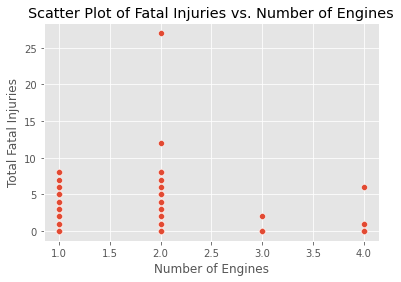

In [115]:
# Scatter plot of 'total_fatal_injuries' against 'number_of_engines'
sns.scatterplot(x='number_of_engines', y='total_fatal_injuries', data=df)

plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Scatter Plot of Fatal Injuries vs. Number of Engines')
plt.show()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***